In [4]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Decision tree classifier
from sklearn.model_selection import train_test_split
from sklearn import metrics # scikit-learn metrics module for computing accuracy
import warnings
warnings.filterwarnings('ignore') # Ignore warning messages

<h2>Dataset loading and exploratory data analysis</h2>

In [5]:
#Loading dataset
diabetes_df = pd.read_csv('diabetes.csv')
diabetes_df.head() # Preview the dataset
diabetes_df.shape # Number of instances and variables

(768, 9)

In [6]:
#Renaming columns

col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age',
'label'] # Define new column names
diabetes_df.columns = col_names # Rename column names

In [7]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pregnant  768 non-null    int64  
 1   glucose   768 non-null    int64  
 2   bp        768 non-null    int64  
 3   skin      768 non-null    int64  
 4   insulin   768 non-null    int64  
 5   bmi       768 non-null    float64
 6   pedigree  768 non-null    float64
 7   age       768 non-null    int64  
 8   label     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
#Frequency distributions of values in variables
for col in col_names:
    print(diabetes_df[col].value_counts())
    

#Exploring target variable
diabetes_df['label'].value_counts()


#Checking missing values in variables
diabetes_df.isnull().sum()




Index(['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree',
       'age', 'label'],
      dtype='object')


In [9]:
#Defining feature vector and target variable
X = diabetes_df.drop(['label'], axis=1) # Drop the target variable
y = diabetes_df['label']

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,
random_state=1) # 75% training and 25% test
X_train.shape, X_test.shape # Shapes of X_train and X_test

print(X_train)


     pregnant  glucose  bp  skin  insulin   bmi  pedigree  age
118         4       97  60    23        0  28.2     0.443   22
205         5      111  72    28        0  23.9     0.407   27
506         0      180  90    26       90  36.5     0.314   35
587         6      103  66     0        0  24.3     0.249   29
34         10      122  78    31        0  27.6     0.512   45
..        ...      ...  ..   ...      ...   ...       ...  ...
645         2      157  74    35      440  39.4     0.134   30
715         7      187  50    33      392  33.9     0.826   34
72         13      126  90     0        0  43.4     0.583   42
235         4      171  72     0        0  43.6     0.479   26
37          9      102  76    37        0  32.9     0.665   46

[576 rows x 8 columns]


In [10]:
#Feature engineering: encoding categorical variables

X_train.dtypes # Check data types in X_train
import category_encoders as ce # Import the relevant library

encoder = ce.OrdinalEncoder(cols=['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi','pedigree', 'age'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

print(X_train.head())


     pregnant  glucose  bp  skin  insulin  bmi  pedigree  age
118         1        1   1     1        1    1         1    1
205         2        2   2     2        1    2         2    2
506         3        3   3     3        2    3         3    3
587         4        4   4     4        1    4         4    4
34          5        5   5     5        1    5         5    5


In [11]:
#Building decision tree classifier with the Gini index criterion
clf_gini = DecisionTreeClassifier(criterion='gini',
max_depth=4,
random_state=0) # Create decision tree
#classifier object
clf_gini.fit(X_train, y_train) # Train the classifier

DecisionTreeClassifier(max_depth=4, random_state=0)

In [12]:
y_pred = clf_gini.predict(X_test)
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))




Accuracy: 0.6875


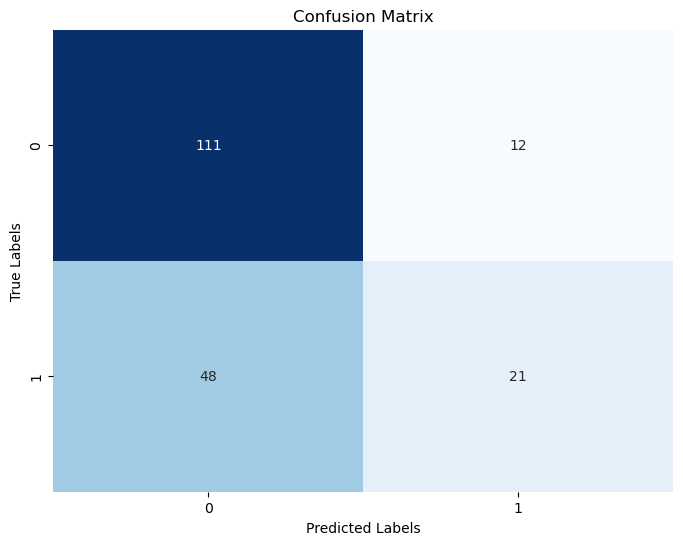

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(confusion_matrix):
    plt.figure(figsize=(8, 6))
    ax = sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
    ax.set_xlabel('Predicted Labels')
    ax.set_ylabel('True Labels')

    plt.title('Confusion Matrix')
    plt.show()

# Example confusion matrix

conf_mat = confusion_matrix(y_test, y_pred)

plot_confusion_matrix(conf_mat)





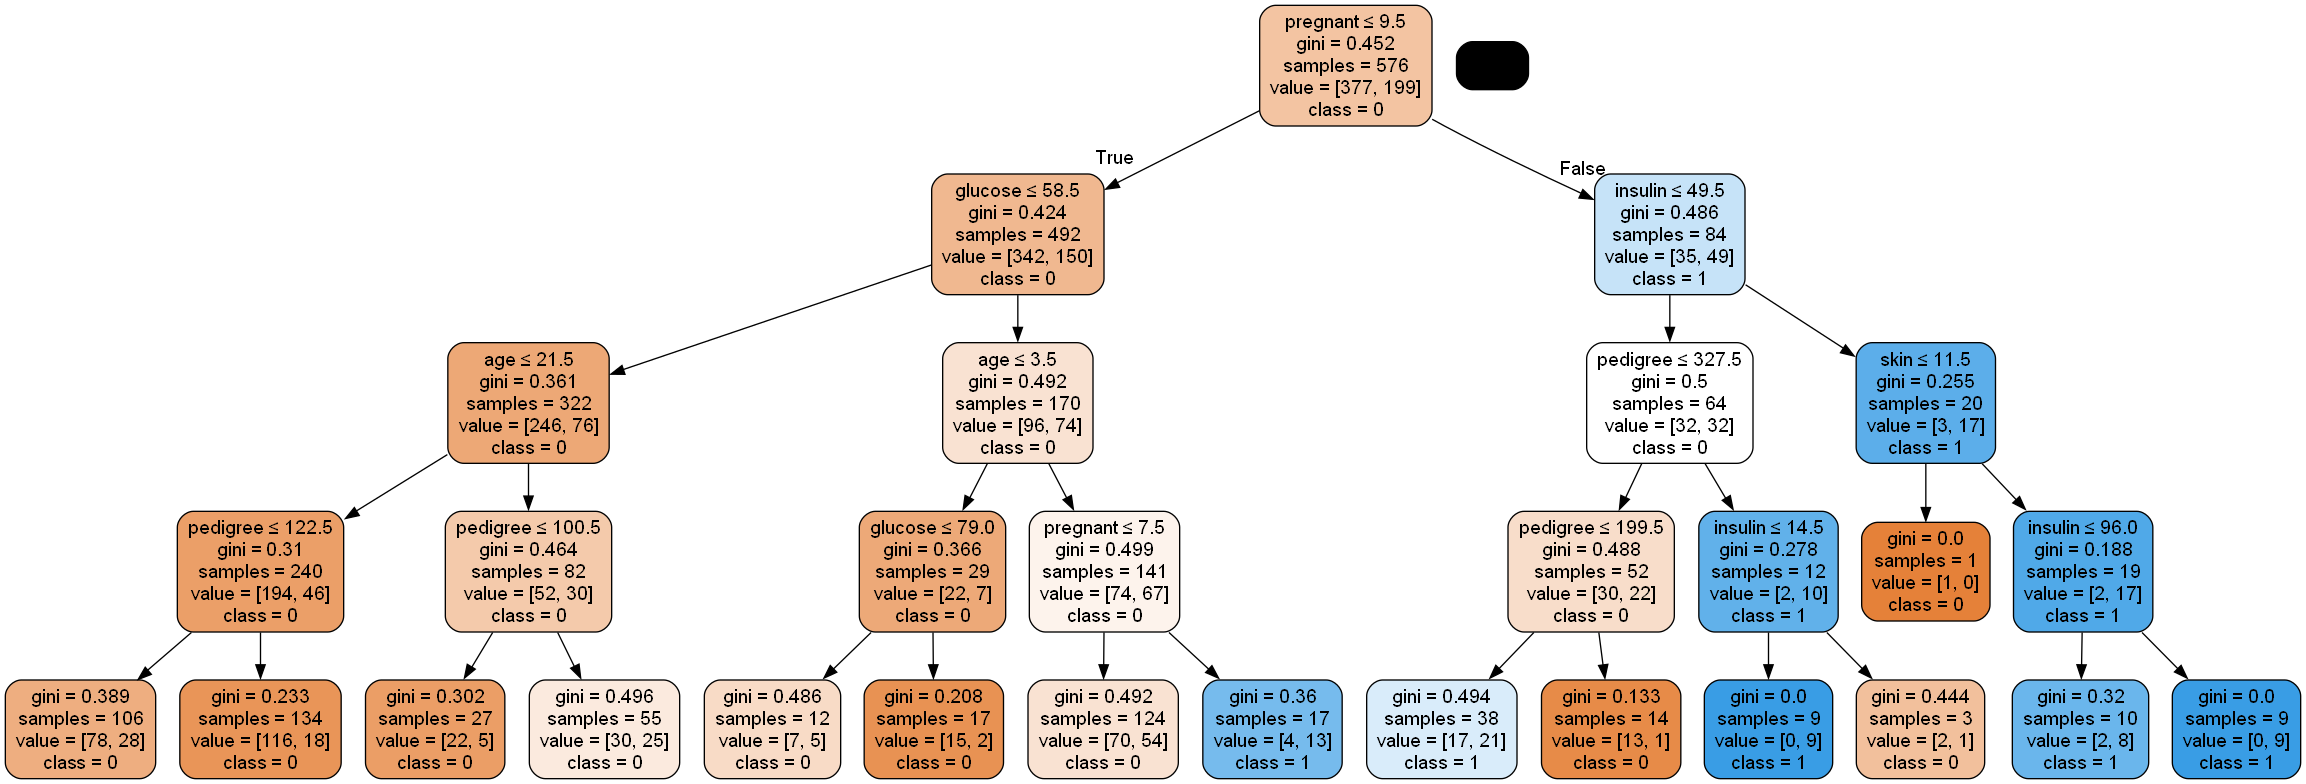

In [14]:
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf_gini,
    out_file=dot_data,
    filled=True,
    rounded=True,
    special_characters=True,
    feature_names=X.columns,
    class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())

In [15]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.70      0.90      0.79       123
           1       0.64      0.30      0.41        69

    accuracy                           0.69       192
   macro avg       0.67      0.60      0.60       192
weighted avg       0.68      0.69      0.65       192

